In [9]:
# t
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, r2_score, roc_curve, auc, accuracy_score, roc_auc_score


In [14]:
def check_model(m, X, y, verbose = False):
    y_prob = m.predict_proba(X)[:,1]
    fpr, tpr, _ = roc_curve(y, y_prob) 
    g = round((2 * auc(fpr, tpr) - 1), 4)
    if verbose:   
        y_pred = m.predict(X)
        y_dec_score = m.decision_function(X)
        accuracy = accuracy_score(y, y_pred)
        print(f'accuracy = {accuracy:2.5f}')
        f1 = f1_score(y, y_pred)
        print(f'F1 score = {f1:2.5f}')
        roc_auc_sc1 = roc_auc_score(y, y_prob)
        roc_auc_sc2 = roc_auc_score(y, y_dec_score)
        print(f'roc_auc_score (prob based) = {roc_auc_sc1:2.5f}')
        print(f'roc_auc_score (dec_func_based) = {roc_auc_sc2:2.5f}')        
        print(f'AUC = {auc(fpr, tpr):2.5f}')    
        print(f'(2 * roc_AUC - 1 ) = {g:2.5f}')
        plt.plot(fpr, tpr, linewidth=2)
        plt.plot([0, 1], [0, 1], 'k--')  
        plt.xlabel('False positive Rate')
        plt.ylabel('True Positive Rate (Recall)')
        plt.show()
    return 

In [5]:
tmp

,x1,target
0,0.000000,0.853031
1,1.111111,3.075253
2,2.222222,5.297475
3,3.333333,7.519697
4,4.444444,9.741920
5,5.555556,11.964142
6,6.666667,14.186364
7,7.777778,16.408586
8,8.888889,18.630809
9,10.000000,20.853031


AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

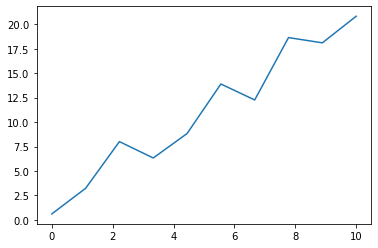

In [15]:

tmp = pd.DataFrame(data = {'x1': np.linspace(0,10, 10)})
                           
tmp['target'] = tmp.x1.apply(lambda x: 2*x+np.random.normal(0,2))
y = tmp.target
x = tmp.drop('target', axis = 1).values
lm = LinearRegression()
plt.plot(x, y)
plt.show
lm.fit(x,y)
lm.coef_
check_model(lm, x, y)